## Part A: Model Code

#### 1. Write a function to calculate and return the Euclidean distance of two vectors where a vector represents a data point

We are representing the vectors are numpy arrays

In [1]:
import numpy as np

def euclidean_distance(v1, v2):
        
    # Calculate the sum of the squared differences between the two vectors
    sumOfSquares = np.sum((v1-v2) ** 2)
    # calculate the square root of the sum of squares
    euDistance= np.sqrt(sumOfSquares)
    
    return euDistance

#### 2. Also write a function to calculate and return the Manhattan distance of two vectors

In [2]:
def manhattan_distance(v1, v2):
    #Calculate the sum of the absolute differences between the two vectors
    sumOfAbsDiff = np.sum(np.absolute(v1-v2))
    #return the manhattan distance
    return sumOfAbsDiff

#### 3. Write a function to calculate and return the accuracy and generalization error of two vectors

In [3]:
#accuracy is defined as TP+TN/TP+TN+FP+FN. True predictions divided by all predictions
def accuracy(predicted, true):
    #Calculating the correct predictions using a loop. Correct predictions increase if the two vectors values match
    num_correct = 0
    for i in range(len(predicted)):
        if predicted[i] == true[i]:
            num_correct += 1
    accuracy = num_correct / len(predicted)
    return accuracy

#The generalization error is simply 1-accuracy
def g_error(predicted, true):
    return 1-accuracy(predicted, true)
    

#### 4. Write three functions to compute: precision, recall and F1 score

In [4]:
#This function simply returns the values TN FP FN and TP as a 1D array
#This function is helper function to calculate confusion matrix accuracy, recall, f1,and precision
def classify_results(pred, true):
    # matrix_values is defined as [TN,FP,FN,TP]
    matrix_values = [0, 0, 0, 0]
    for i in range(len(pred)):
        if pred[i] == 0:
            if pred[i] == true[i]:
                # increasing value of TN
                matrix_values[0] = matrix_values[0] + 1
            else:
                # increasing value of FN
                matrix_values[2] = matrix_values[2] + 1
        else:
            if pred[i] == true[i]:
                # increasing value of TP
                matrix_values[3] = matrix_values[3] + 1
            else:
                # increasing value of FP
                matrix_values[1] = matrix_values[1] + 1
    return matrix_values


# Precision is defined as TP/TP+FP
def precision(predicted, true):
    class_values = classify_results(predicted, true)
    return class_values[3]/(class_values[3]+class_values[1])


# Recall is defined as TP/TP+FN
def recall(predicted, true):
    class_values = classify_results(predicted, true)
    return class_values[3] / (class_values[3] + class_values[2])


# The F1 score(harmonic mean) is defined as 2(precision*Recall/Precision+Recall)
def f1_score(predicted, true):
    class_values = classify_results(predicted, true)
    return class_values[3]/(class_values[3]+((class_values[2]+class_values[1])/2))


#### 5. Write a function to compute the confusion matrix of two vectors

In [5]:
#using helper function classify results to form a confusion matrix
def confusion_matrix(predicted, true):
    class_values = classify_results(predicted, true)
    # The confusion matrix is represented as follows[[TN,FP],[FN,TP]]
    return np.array([[class_values[0], class_values[1]], [class_values[2], class_values[3]]])

#### 6. Write a function to generate the Receiver Operating Characteristic (ROC) curve

#### 7. Write a function to compute area under curve (AUC) for the ROC curve

#### 8. Write a function to generate the precision-recall curve

#### 9. Implement a KNN_Classifier model class. It should have the following three methods
    

In [6]:
import collections
import numpy as np

class KNN_Classifier:
    def __init__(self):
        pass

    # The X and y that is passed here is the training independent and dependent variable
    def fit(self, X, y, n_neighbors,dist ,weights='uniform', kwargs=None):
        self.X_train = X
        self.y_train = y
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.kwargs = kwargs
        self.dist=dist

    # The X variable passed here is the test data
    def predict(self, X_test):
        y_predicted =np.array([self._predict(x) for x in X_test])
        return y_predicted
    def _predict(self ,x):
        # compute distance by Euclidean distance or Manhattan
        if self.dist == "M":
            distances =[manhattan_distance(x, x_train) for x_train in self.X_train]
        else:
            distances =[euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # calculating closets K neighbor
        ordered_neighbor_indices = np.argsort(distances)[:self.n_neighbors]
        nearest_neighbor_labels = [self.y_train[i] for i in ordered_neighbor_indices]
        # Getting the majority vote to get prediction
        most_common_label=collections.Counter(nearest_neighbor_labels).most_common()
        return most_common_label[0][0]

## Part B: Data Processing

#### 10. Read in the winequality-white.csv file as a Pandas data frame


##### importing data and getting a general idea of the data set

In [7]:
import pandas as pd
df = pd.read_csv('winequality-white.csv', sep=";")

print("Dimension of the data: ", df.shape)
no_of_rows = df.shape[0]
no_of_columns = df.shape[1]
print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

df.head(5)

Dimension of the data:  (4898, 12)
No. of Rows: 4898
No. of Columns: 12


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [8]:
df['quality']

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
print('\nColumn Name:', 'quality',)
print(df['quality'].value_counts())


Column Name: quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


#### 11. Rearrange the quality attribute

The target will be the “quality” column which represents rating of wine and ranges from 3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality > 5)& “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine) 

In [11]:
#rearranging quality and creating a new column named categorized quality
df['categorized quality'] = [1 if x > 5 else 0 for x in df['quality']]

#testing the rearranging worked
print('\nColumn Name:', 'quality',)
print(df['quality'].value_counts())
print('\nColumn Name:', 'categorized quality',)
print(df['categorized quality'].value_counts())



Column Name: quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Column Name: categorized quality
1    3258
0    1640
Name: categorized quality, dtype: int64


#### 12. Summary of the dataset

In [12]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  categorized quality  
count  4898.000000  4898.000000  4898.000000  4898.000000          4898.000000  
mean      3.188267     0.489847    10.514267     5.877909             0.665169  
std       0.151001     0.114126     1.230621     0.885639             0.471979  
min       2.720000     0.220000     8.000000     3.000000             0.000000  
25%       3.090000     0.410000     9.500000     5.000000             0.000000  
50%       3.180000     0.470000    10.400000     6.000000             1.000000  
75%       3.280000     0.550000    11.400000     6.000000             1.000000  
max       3.820000     1.080000    14.200000     9.000000             1.000000

#### 13. Shuffle the rows of your data. 

In [13]:
sample = df.sample(frac=1)

In [14]:
#The new dataframe called sample is a shuffled copy of the original dataframe df
sample.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4549            6.9              0.28         0.37             9.1      0.037   
270             6.9              0.32         0.26             8.3      0.053   
3007            5.0              0.27         0.32             4.5      0.032   
1075            6.4              0.40         0.19             3.2      0.033   
2193            7.1              0.18         0.32            12.2      0.048   
1107            7.2              0.37         0.15             2.0      0.029   
3362            7.2              0.22         0.28             7.2      0.060   
139             8.1              0.28         0.39             1.9      0.029   
1579            7.6              0.31         0.49            13.4      0.062   
3280            6.4              0.15         0.29             1.8      0.044   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4549                 16.0                  76.0  0.99480  3.05       0.54   
270                  32.0                 180.0  0.99650  3.25       0.51   
3007                 58.0                 178.0  0.98956  3.45       0.31   
1075                 28.0                 124.0  0.99040  3.22       0.54   
2193                 36.0                 125.0  0.99670  2.92       0.54   
1107                 27.0                  87.0  0.99030  3.30       0.59   
3362                 41.0                 132.0  0.99350  3.08       0.59   
139                  18.0                  79.0  0.99230  3.23       0.52   
1579                 50.0                 191.0  0.99890  3.22       0.53   
3280                 21.0                 115.0  0.99166  3.10       0.38   

      alcohol  quality  categorized quality  
4549     11.1        5                    0  
270       9.2        6                    1  
3007     12.6        7                    1  
1075     12.7        7                    1  
2193      9.4        6                    1  
1107     12.6        7                    1  
3362     11.3        6                    1  
139      11.8        6                    1  
1579      9.0        4                    0  
3280     10.2        5                    0

#### 14. Generate pair plots using the seaborn package. This will be used to identify and report the redundant features, if there is any

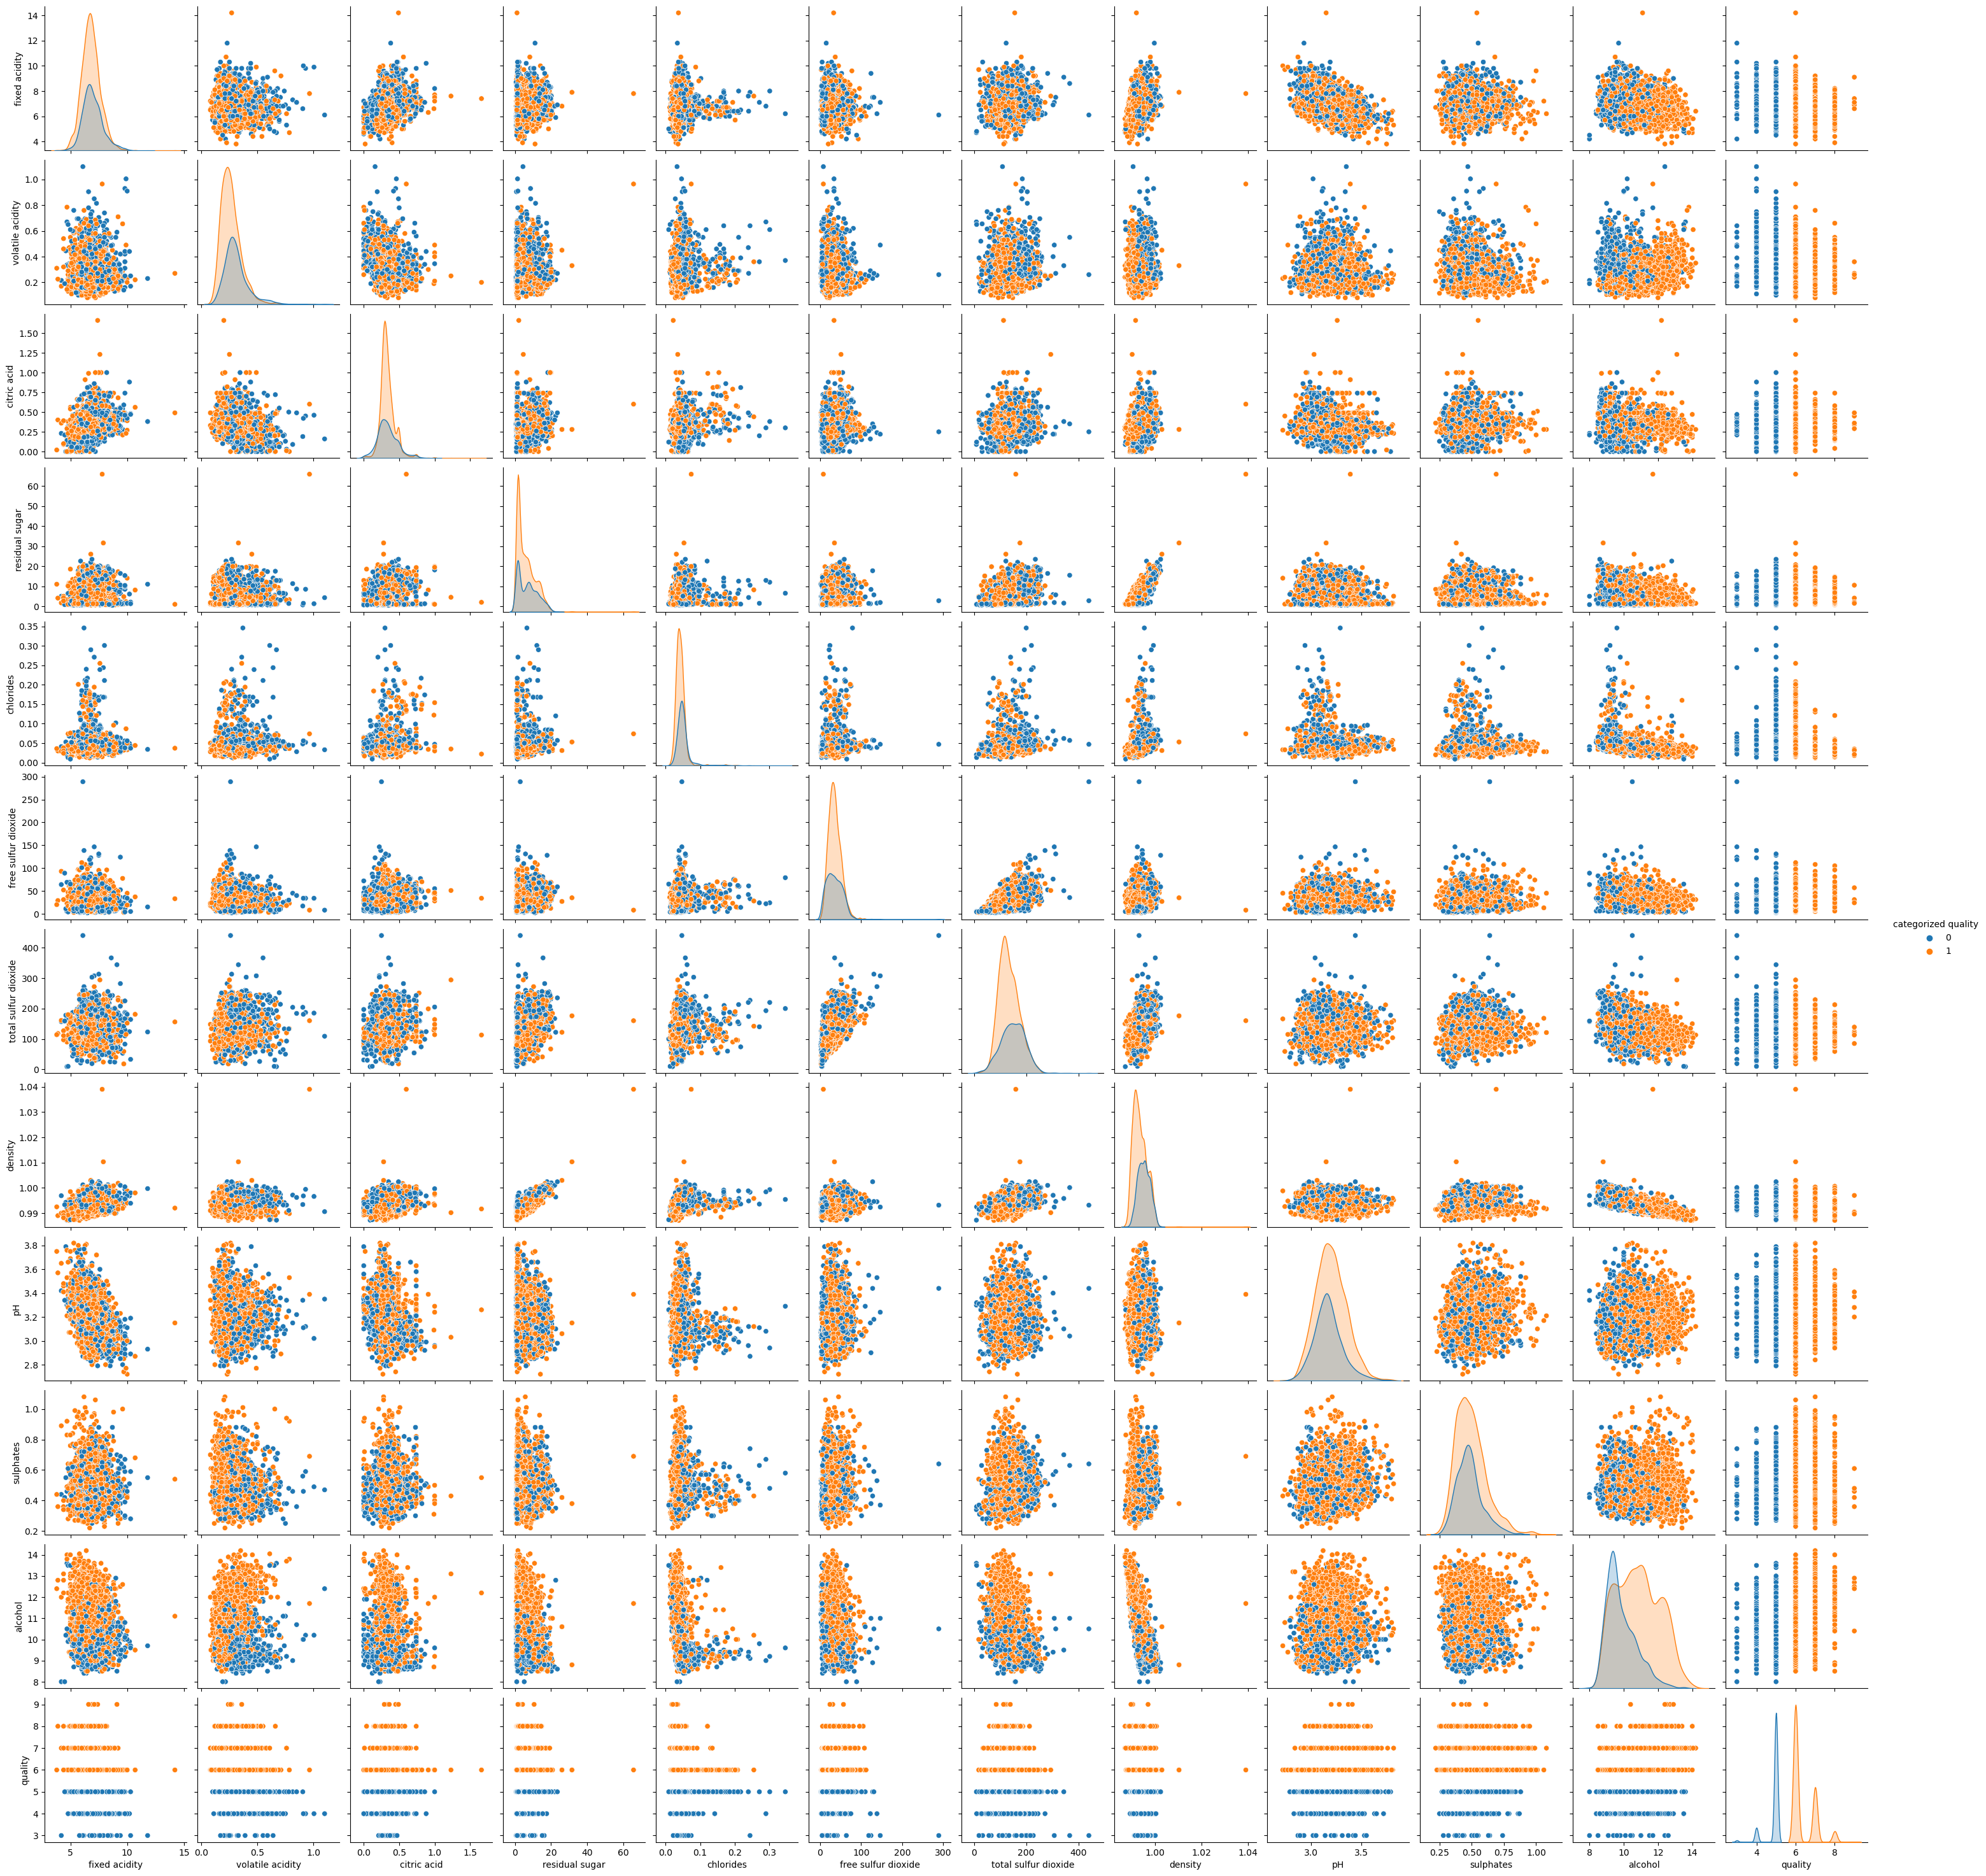

In [15]:
#using seaborn to create a pairplot to help analyze the data
import seaborn as sns
sns.pairplot(sample, hue='categorized quality')

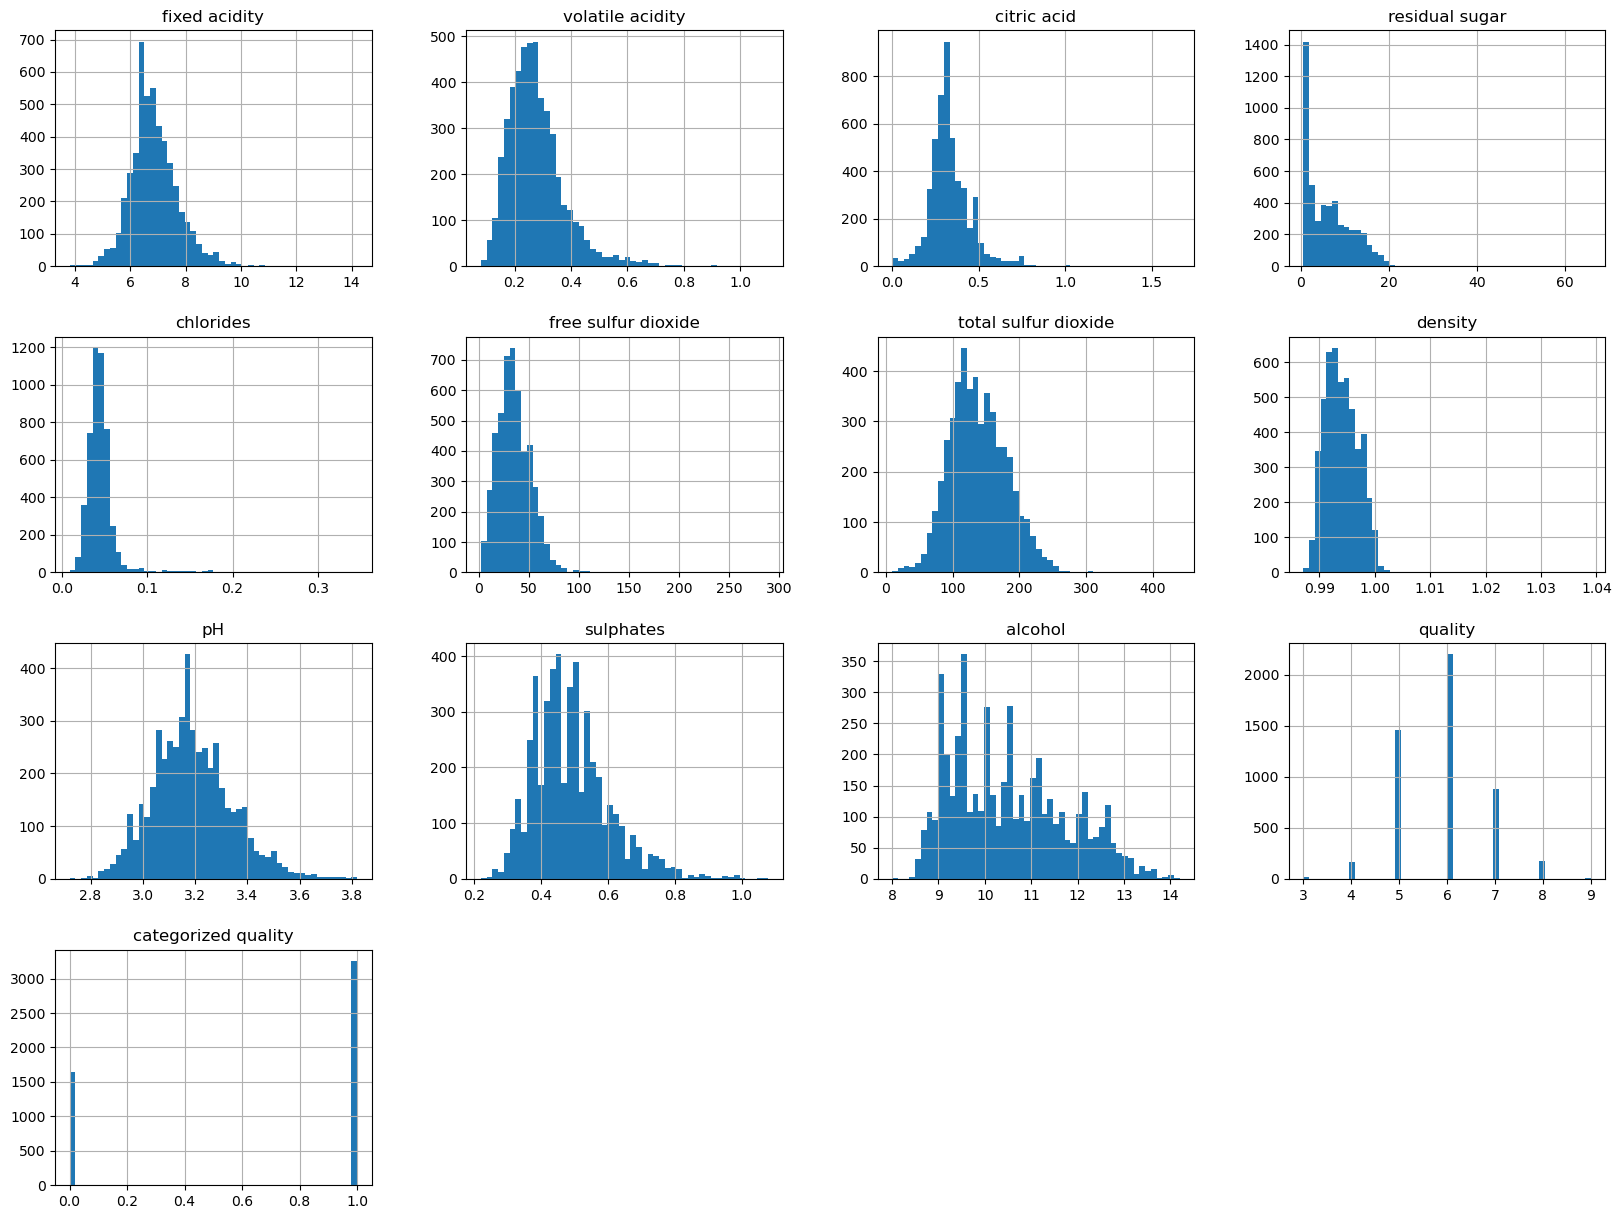

In [16]:
#I am also plotting all the features to further understand the data and the distribution of the features
%matplotlib inline
import matplotlib.pyplot as plt
sample.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
#getting the correlation table to help me decide which features are best to keep and ones that need to be dropped
sample.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   
categorized quality       -0.089749         -0.225440    -0.000700   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   
categorized quality        -0.092756  -0.183939            -0.001278   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   
categorized quality              -0.170924 -0.268696  0.083687   0.051858   

                       alcohol   quality  categorized quality  
fixed acidity        -0.120881 -0.113663            -0.089749  
volatile acidity      0.067718 -0.194723            -0.225440  
citric acid          -0.075729 -0.009209            -0.000700  
residual sugar       -0.450631 -0.097577            -0.092756  
chlorides            -0.360189 -0.209934            -0.183939  
free sulfur dioxide  -0.250104  0.008158            -0.001278  
total sulfur dioxide -0.448892 -0.174737            -0.170924  
density              -0.780138 -0.307123            -0.268696  
pH                    0.121432  0.099427             0.083687  
sulphates            -0.017433  0.053678             0.051858  
alcohol               1.000000  0.435575             0.383280  
quality               0.435575  1.000000             0.802541  
categorized quality   0.383280  0.802541             1.000000

#### 15. Drop redundant features and provide an explanation for doing so

In [18]:
#dropping redundant features from sample dataframe
sample = sample.drop(labels=['citric acid','residual sugar','pH','free sulfur dioxide','sulphates','quality'], axis = 1) 

In [19]:
sample.head()

fixed acidity  volatile acidity  chlorides  total sulfur dioxide  \
4549            6.9              0.28      0.037                  76.0   
270             6.9              0.32      0.053                 180.0   
3007            5.0              0.27      0.032                 178.0   
1075            6.4              0.40      0.033                 124.0   
2193            7.1              0.18      0.048                 125.0   

      density  alcohol  categorized quality  
4549  0.99480     11.1                    0  
270   0.99650      9.2                    1  
3007  0.98956     12.6                    1  
1075  0.99040     12.7                    1  
2193  0.99670      9.4                    1

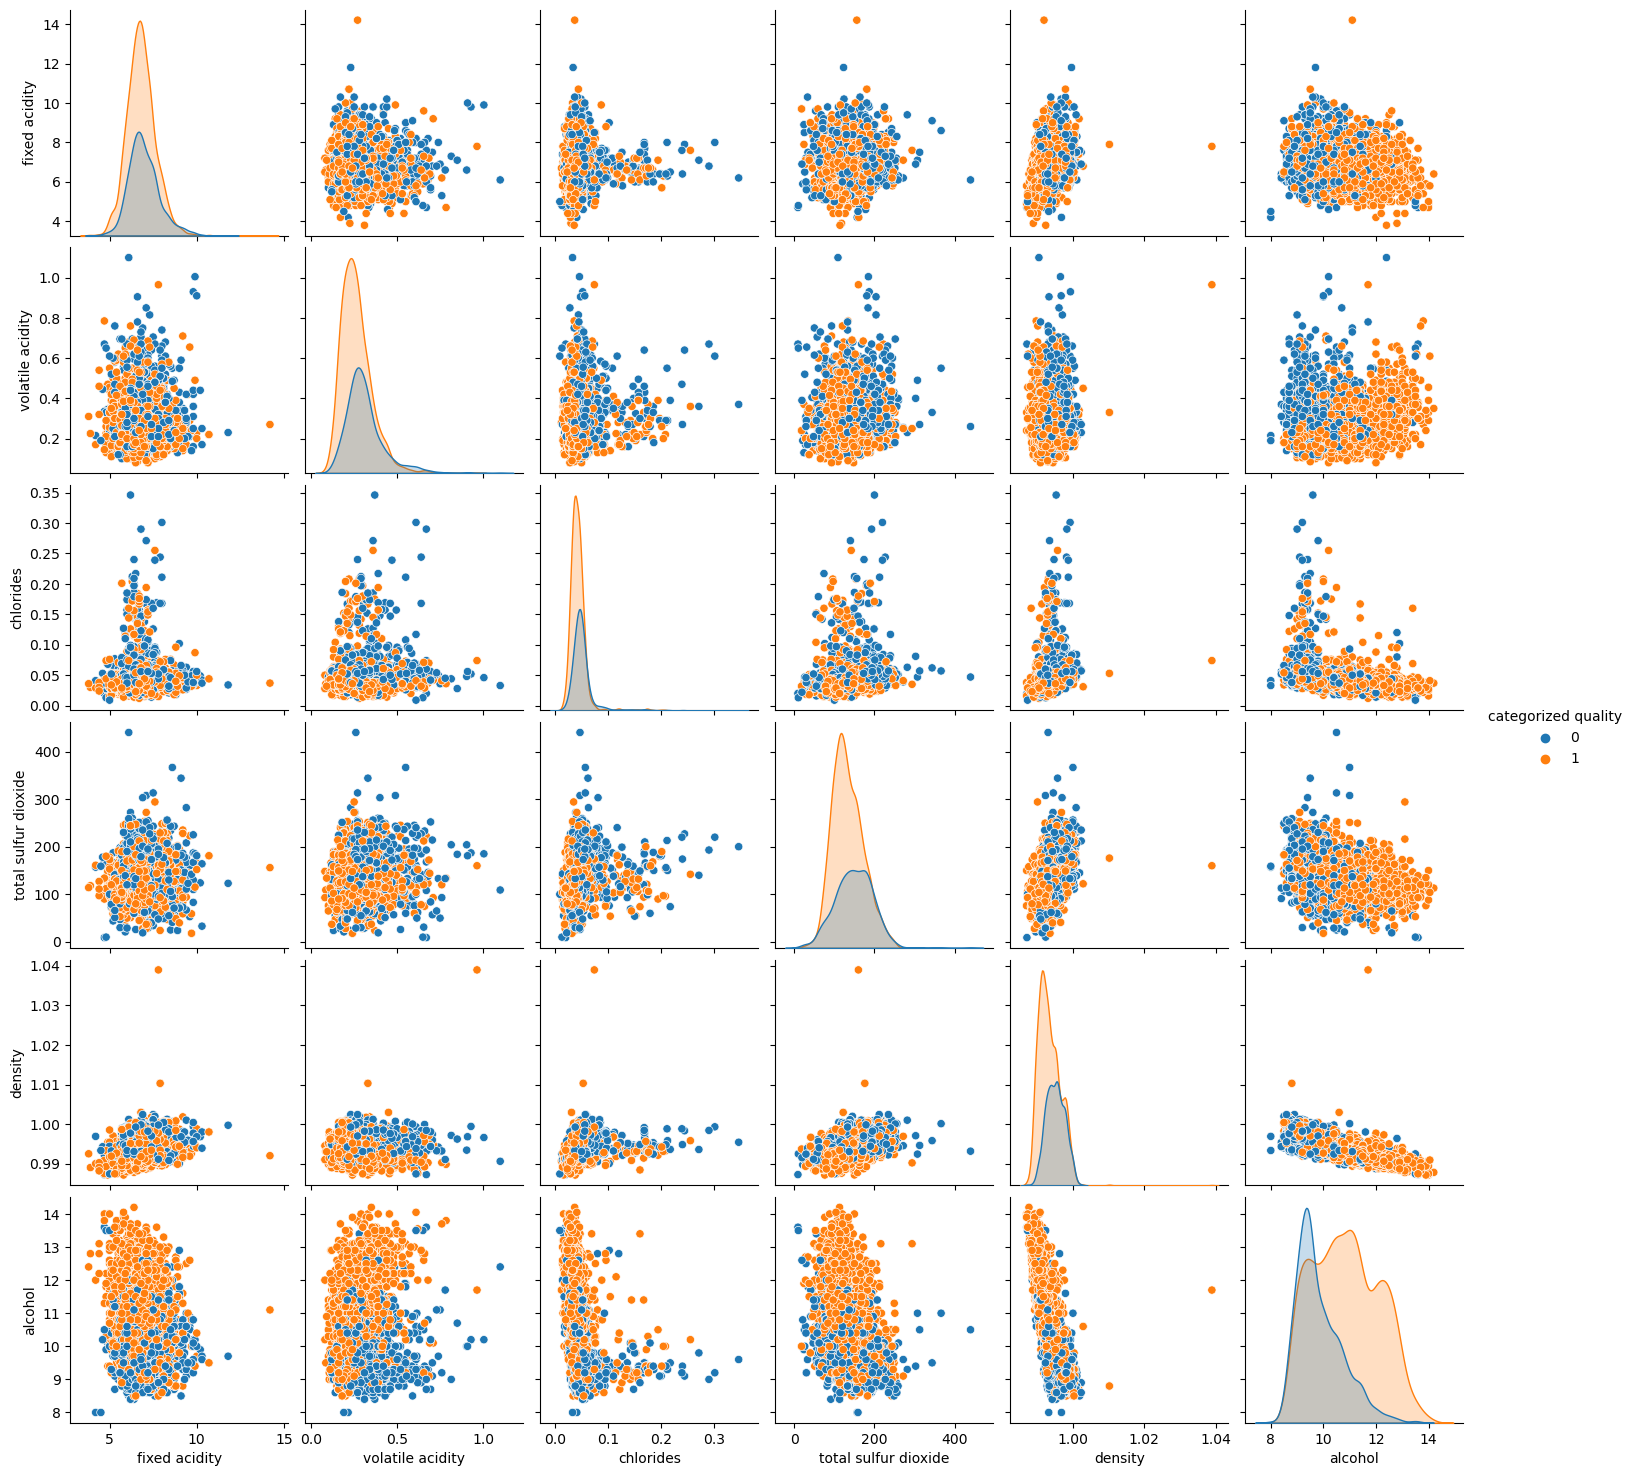

In [20]:
#vizualizing the features that are left
sns.pairplot(sample, hue='categorized quality')

#### 16. Write a function named “partition” to split your data into training and test set. The function should take 3 arguments

In [21]:
#the feat_matrix is the matrix containing all the features also known as X
#target vector is the vector with the labels, also known as y
#t is the percent of the data that will be separated as the test data
def partition(feat_matrix, target_vector,t):
    #getting the size of the matrix
    test_set_size = int(len(feat_matrix)*t)
    #based on the test_set_size we are setting the new variables that will be returned
    train_X = feat_matrix[test_set_size:]
    test_X = feat_matrix[:test_set_size]
    train_y = target_vector[test_set_size:]
    test_y = target_vector[:test_set_size]
    
    return train_X, test_X, train_y, test_y

#### 17. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and using Euclidean distance

In [22]:
#setting the testing data to be 20% of the total data
t=0.2

#creating the dataframes to be partitioned into train_matrix, test_matrix, train_target_vector, test_target_vector
target=sample['categorized quality'] # 1D targer vector

# Data Matrix containing all features excluding the target
feat_matrix = sample.drop(labels='categorized quality', axis=1) 

#converting the dataframes into numpy arrays
feat_matrix=feat_matrix.to_numpy()
target=target.to_numpy()

#all partitions and printin the lentgh of each one to confirm 
train_matrix, test_matrix,train_target_vector, test_target_vector = partition(feat_matrix,target,t)
print(len(train_matrix))
print(len(test_matrix))
print(len(train_target_vector))
print(len(test_target_vector))

3919
979
3919
979


In [23]:
#Naively running the model
first_try = KNN_Classifier()
first_try.fit(train_matrix,train_target_vector,5,'E')
y_predicted=first_try.predict(test_matrix)

#making sure the length of the prediced vector matches the test_target_vector
len(y_predicted)

979

In [24]:
#simply vizualizing first 10 values of the y_predicted vector
y_predicted[:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [25]:
#calculating and printing the F1 score and accuracy
print(f"F1 score: {f1_score(y_predicted, test_target_vector)}")
print(f"Accuracy: {accuracy(y_predicted, test_target_vector)}")

F1 score: 0.7987897125567323
Accuracy: 0.72829417773238


In [26]:
# mean = np.mean(train_matrix, axis=0)
# print(type(mean))
# mean

In [27]:
import numpy as np
def standardize_data_sets(train_X, test_X):
    # Calculateing mean and standard deviation for each feature and store in numpy array
    mean = np.mean(train_X, axis=0)
    std = np.std(train_X, axis=0)
    # Standardize the training matrix
    standardized_train_X = (train_X - mean) / std

    # Scale the test set using the mean and standard deviation of the training matrix
    standardized_test_X = (test_X - mean) / std

    return standardized_train_X, standardized_test_X

In [29]:
#standardizing the data
std_train_matrix,std_test_matrix=standardize_data_sets(train_matrix, test_matrix)

#running the model with the standard data
std_prediction = KNN_Classifier()
std_prediction.fit(std_train_matrix,train_target_vector,5,"E")
std_y_predicted=first_try.predict(std_test_matrix)

#making sure the std predicted and test vectors are the same length
print(len(std_y_predicted))
print(len(test_target_vector))

979
979


In [30]:
#calculating and printing the f1 scores for the standard data
print(f"F1 score: {f1_score(std_y_predicted, test_target_vector)}")
print(f"Accuracy: {accuracy(std_y_predicted, test_target_vector)}")

F1 score: 0.0
Accuracy: 0.33707865168539325


## Part C: Model Evaluation

#### 18. Evaluation of an estimator performance via cross-validation: Implement the S-fold crossvalidation function

In [31]:
import numpy as np

#partition_data() is a helper function that splits the data into a given number of folds
# data must me numpy array
def partition_data(data, folds):
    # Partition the data into s equally sized portions
    partitions = np.array_split(data, folds)
    return partitions
#function to calculate mean squared error
def mean_squared_error(y_true, y_pred):
    mse = np.mean(np.square(y_true - y_pred))
    return mse

#sFold function that calls to helper function
#partitions the data based on which fold it is running the model

def sFold(folds, data, labels,k,dist):
    #splitting the data and the target labels into given number of folds
    #storing the split data and labels in numpy arrays
    split_data = partition_data(data, folds)
    split_labels = partition_data(labels, folds)
    
    
    #These are 1-d vectors that willl store the labels for every single cross validation
    y_test_all_partitions=[]
    y_pred_all_partitions=[]
    
    #for loop that loops over each cross validation(fold)
    for i in range(0, folds):
        # initializing the X_test and y_test numpy variables
        y_test = split_labels[i]
        X_test = split_data[i]
        
        #initializing and storing the train data is not so easy as the test data because we have to 
        #combine the remaining folds into one large numpy array
        #for example if folds=5, the test data will simply be 1/5th of the total data
        #the training data will be 4/5th of the total data
        #on the next two for loops I am concatenating the remaining data not including the 1/5th that belongs
        #to the test data
        #essentially the for loops are appending 1/5th+ 1/5th+ 1/5th+ 1/5th= 4/5th for the 
        #train data and train vector of the current cross validation(fold)
        initialized_y = False
        initialized_X = False
        for j in range(0, folds):
            if j != i and initialized_y == False:
                y_train = split_labels[j]
                initialized_y = True
            elif j != i:
                y_train = np.append(y_train, split_labels[j], axis=0)

        for j in range(0, folds):
            if j != i and initialized_X == False:
                X_train = split_data[j]
                initialized_X = True
            elif j != i:
                X_train = np.append(X_train, split_data[j], axis=0)
                
        # using the current cross validation(fold) data to train the model
        predict_partition = KNN_Classifier()
        predict_partition.fit(X_train, y_train, k,dist)
        y_predicted_partition = predict_partition.predict(X_test)
        
        #in this for loop we are simply creating the vectors with the results of all the cross validations(folds)
        for g in range(len(y_test)):
            y_test_all_partitions.append(y_test[g])
            y_pred_all_partitions.append(y_predicted_partition[g])
            
        #using the mean_squared_error function to calculate the MSE of the total cross validation
        mse=mean_squared_error(np.asarray(y_test_all_partitions),np.asarray(y_pred_all_partitions))
    return np.asarray(y_test_all_partitions),np.asarray(y_pred_all_partitions),mse



#### 19. Use your sfold function to evaluate the performance of your model over each combination of k and distance metrics from the following sets

#### Evaluating various k with Euclidean Distance

In [32]:
#testing the model with k=1
k=1
one_k_expected_labels,one_k_predicted_labels,one_k_average_error=sFold(5,feat_matrix,target,k,'E')

#printing length of expected and predicted labels to make sure results are correct
print(f"Length of total expected labels: {len(one_k_expected_labels)}")
print(f"Length of total predicted labels: {len(one_k_predicted_labels)}")
print(f"MSE value: {one_k_average_error}")


Length of total expected labels: 4898
Length of total predicted labels: 4898
MSE value: 0.2443854634544712


In [33]:
#testing the model with k=5
k=5
five_k_expected_labels,five_k_predicted_labels,five_k_average_error=sFold(5,feat_matrix,target,k,'E')

#printing length of expected and predicted labels to make sure results are correct
print(f"Length of total expected labels: {len(five_k_expected_labels)}")
print(f"Length of total predicted labels: {len(five_k_predicted_labels)}")
print(f"MSE value: {five_k_average_error}")


Length of total expected labels: 4898
Length of total predicted labels: 4898
MSE value: 0.27827684769293587


In [34]:
#testing the model with k=9
k=9
nine_k_expected_labels,nine_k_predicted_labels,nine_k_average_error=sFold(5,feat_matrix,target,k,'E')

#printing length of expected and predicted labels to make sure results are correct
print(f"Length of total expected labels: {len(nine_k_expected_labels)}")
print(f"Length of total predicted labels: {len(nine_k_predicted_labels)}")
print(f"MSE value: {nine_k_average_error}")


Length of total expected labels: 4898
Length of total predicted labels: 4898
MSE value: 0.2799101674152715


In [35]:
#testing the model with k=11
k=11
eleven_k_expected_labels,eleven_k_predicted_labels,eleven_k_average_error=sFold(5,feat_matrix,target,k,'E')

#printing length of expected and predicted labels to make sure results are correct
print(f"Length of total expected labels: {len(eleven_k_expected_labels)}")
print(f"Length of total predicted labels: {len(eleven_k_predicted_labels)}")
print(f"MSE value: {eleven_k_average_error}")

Length of total expected labels: 4898
Length of total predicted labels: 4898
MSE value: 0.28358513679052677


#### Evaluating K with manhattan distance

In [36]:
#testing the model with k=1
k=1
k1_exp_labels,k1_pre_labels,k1_avrg_error=sFold(5,feat_matrix,target,k,'M')

#printing length of expected and predicted labels to make sure results are correct
print(f"Length of total expected labels: {len(k1_exp_labels)}")
print(f"Length of total predicted labels: {len(k1_pre_labels)}")
print(f"MSE value: {k1_avrg_error}")

Length of total expected labels: 4898
Length of total predicted labels: 4898
MSE value: 0.23805634953042057


In [37]:
#testing the model with k=5
k=5
k5_exp_labels,k5_pre_labels,k5_avrg_error=sFold(5,feat_matrix,target,k,'M')

#printing length of expected and predicted labels to make sure results are correct
print(f"Length of total expected labels: {len(k5_exp_labels)}")
print(f"Length of total predicted labels: {len(k5_pre_labels)}")
print(f"MSE value: {k5_avrg_error}")

Length of total expected labels: 4898
Length of total predicted labels: 4898
MSE value: 0.27888934258881176


In [38]:
#testing the model with k=9
k=9
k9_exp_labels,k9_pre_labels,k9_avrg_error=sFold(5,feat_matrix,target,k,'M')

#printing length of expected and predicted labels to make sure results are correct
print(f"Length of total expected labels: {len(k9_exp_labels)}")
print(f"Length of total predicted labels: {len(k9_pre_labels)}")
print(f"MSE value: {k9_avrg_error}")

Length of total expected labels: 4898
Length of total predicted labels: 4898
MSE value: 0.27950183748468765


In [39]:
#testing the model with k=5
k=11
k11_exp_labels,k11_pre_labels,k11_avrg_error=sFold(5,feat_matrix,target,k,'M')

#printing length of expected and predicted labels to make sure results are correct
print(f"Length of total expected labels: {len(k11_exp_labels)}")
print(f"Length of total predicted labels: {len(k11_pre_labels)}")
print(f"MSE value: {k11_avrg_error}")

Length of total expected labels: 4898
Length of total predicted labels: 4898
MSE value: 0.2848101265822785


#### 20. Evaluate your model on the test data and report the performance measures

#### Evaluating various k with Euclidean distance

In [40]:
#evaluating model with k=1

#accuracy
print(f"accuracy {accuracy(one_k_predicted_labels, one_k_expected_labels)}")
#generalization error
print(f"generalization error {g_error(one_k_predicted_labels, one_k_expected_labels)}")
#precision
print(f"precision {precision(one_k_predicted_labels, one_k_expected_labels)}")
#recall
print(f"recall {recall(one_k_predicted_labels, one_k_expected_labels)}")
#F1 score
print(f"F1 score {f1_score(one_k_predicted_labels, one_k_expected_labels)}")


accuracy 0.7556145365455288
generalization error 0.2443854634544712
precision 0.808256057433443
recall 0.8293431553100061
F1 score 0.8186638388123012


In [41]:
#evaluating model with k=5

#accuracy
print(f"accuracy {accuracy(five_k_predicted_labels, five_k_expected_labels)}")
#generalization error
print(f"generalization error {g_error(five_k_predicted_labels, five_k_expected_labels)}")
#precision
print(f"precision {precision(five_k_predicted_labels, five_k_expected_labels)}")
#recall
print(f"recall {recall(five_k_predicted_labels, five_k_expected_labels)}")
#F1 score
print(f"F1 score {f1_score(five_k_predicted_labels, five_k_expected_labels)}")

accuracy 0.7217231523070641
generalization error 0.2782768476929359
precision 0.7700199487033342
recall 0.8293431553100061
F1 score 0.7985813506723807


In [42]:
#evaluating model with k=9

#accuracy
print(f"accuracy {accuracy(nine_k_predicted_labels, nine_k_expected_labels)}")
#generalization error
print(f"generalization error {g_error(nine_k_predicted_labels, nine_k_expected_labels)}")
#precision
print(f"precision {precision(nine_k_predicted_labels, nine_k_expected_labels)}")
#recall
print(f"recall {recall(nine_k_predicted_labels, nine_k_expected_labels)}")
#F1 score
print(f"F1 score {f1_score(nine_k_predicted_labels, nine_k_expected_labels)}")

accuracy 0.7200898325847285
generalization error 0.2799101674152715
precision 0.7625939326468133
recall 0.8410067526089625
F1 score 0.7998832287257335


In [43]:
#evaluating model with k=11

#accuracy
print(f"accuracy {accuracy(eleven_k_predicted_labels, eleven_k_expected_labels)}")
#generalization error
print(f"generalization error {g_error(eleven_k_predicted_labels, eleven_k_expected_labels)}")
#precision
print(f"precision {precision(eleven_k_predicted_labels, eleven_k_expected_labels)}")
#recall
print(f"recall {recall(eleven_k_predicted_labels, eleven_k_expected_labels)}")
#F1 score
print(f"F1 score {f1_score(eleven_k_predicted_labels, eleven_k_expected_labels)}")

accuracy 0.7164148632094732
generalization error 0.28358513679052677
precision 0.758220502901354
recall 0.8422344996930632
F1 score 0.7980223934855315


#### Evaluating various k with Manhattan Distance

In [44]:
#evaluating model with k=1

#accuracy
print(f"accuracy {accuracy(k1_pre_labels, k1_exp_labels)}")
#generalization error
print(f"generalization error {g_error(k1_pre_labels, k1_exp_labels)}")
#precision
print(f"precision {precision(k1_pre_labels, k1_exp_labels)}")
#recall
print(f"recall {recall(k1_pre_labels, k1_exp_labels)}")
#F1 score
print(f"F1 score {f1_score(k1_pre_labels, k1_exp_labels)}")



accuracy 0.7619436504695795
generalization error 0.23805634953042054
precision 0.8137372525494901
recall 0.832719459791283
F1 score 0.8231189320388349


In [45]:
#evaluating model with k=5

#accuracy
print(f"accuracy {accuracy(k5_pre_labels, k5_exp_labels)}")
#generalization error
print(f"generalization error {g_error(k5_pre_labels, k5_exp_labels)}")
#precision
print(f"precision {precision(k5_pre_labels, k5_exp_labels)}")
#recall
print(f"recall {recall(k5_pre_labels, k5_exp_labels)}")
#F1 score
print(f"F1 score {f1_score(k5_pre_labels, k5_exp_labels)}")



accuracy 0.7211106574111883
generalization error 0.2788893425888117
precision 0.7721518987341772
recall 0.8238182934315531
F1 score 0.7971487971487972


In [46]:
#evaluating model with k=9

#accuracy
print(f"accuracy {accuracy(k9_pre_labels, k9_exp_labels)}")
#generalization error
print(f"generalization error {g_error(k9_pre_labels, k9_exp_labels)}")
#precision
print(f"precision {precision(k9_pre_labels, k9_exp_labels)}")
#recall
print(f"recall {recall(k9_pre_labels, k9_exp_labels)}")
#F1 score
print(f"F1 score {f1_score(k9_pre_labels, k9_exp_labels)}")



accuracy 0.7204981625153124
generalization error 0.2795018374846876
precision 0.7602645356847616
recall 0.8468385512584408
F1 score 0.8012196892696385


In [47]:
#evaluating model with k=11

#accuracy
print(f"accuracy {accuracy(k11_pre_labels, k11_exp_labels)}")
#generalization error
print(f"generalization error {g_error(k11_pre_labels, k11_exp_labels)}")
#precision
print(f"precision {precision(k11_pre_labels, k11_exp_labels)}")
#recall
print(f"recall {recall(k11_pre_labels, k11_exp_labels)}")
#F1 score
print(f"F1 score {f1_score(k11_pre_labels, k11_exp_labels)}")



accuracy 0.7151898734177216
generalization error 0.28481012658227844
precision 0.7562585969738652
recall 0.8437691835481891
F1 score 0.79762077469897
